In [1]:
import pandas as pd

In [2]:
diabetes=pd.read_csv("C:/Users/mohamed ismail/Desktop/pima-indians-diabetes.data.csv")

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

In [6]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x :(x-x.min())/(x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [8]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

In [9]:
import tensorflow as tf

In [10]:
num_preg=tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

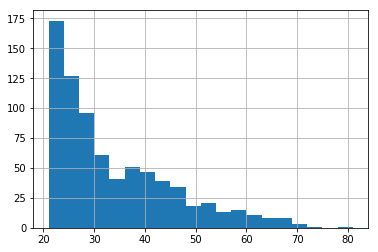

In [13]:
diabetes['Age'].hist(bins=20)

In [14]:
age_buckets=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [15]:
feat_cols=[num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,age_buckets]

In [16]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [17]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [19]:
x_data=diabetes.drop('Class',axis=1)

In [20]:
labels=diabetes['Class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x_data,labels,test_size=0.33,random_state=101)

In [23]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [24]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MOHAME~1\\AppData\\Local\\Temp\\tmp0ghm_54a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000004A85258198>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\MOHAME~1\AppData\Local\Temp\tmp0ghm_54a\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 149.154
INFO:tensorflow:loss = 5.11463, step = 101 (0.673 sec)
INFO:tensorflow:global_step/sec: 256.238
INFO:tensorflow:loss = 5.53676, step = 201 (0.389 sec)
INFO:tensorflow:global_step/sec: 305.607
INFO:tensorflow:loss = 6.53786, step = 301 (0.327 sec)
INFO:tensorflow:global_step/sec: 335.346
INFO:tensorflow:loss = 5.84105, step = 401 (0.298 sec)
INFO:tensorflow:global_step/sec: 287.164
INFO:tensorflow:loss = 5.2532, step = 501 (0.348 sec)
INFO:tensorflow:global_step/sec: 320.298
INFO:tensorflow:loss = 6.17076, step = 601 (0.311 sec)
INFO:tensorflow:global_step/sec: 304.674
INFO:tensorflow:loss = 3.59659, step = 701 (0.329 sec)
INFO:tensorflow:global_step/sec: 342.236
INFO:tensorflow:loss = 4.19241, step = 801 (0.292 sec)
INFO:tensorflow:global_step/sec: 346.991


In [26]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [27]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-01-31-17:55:45
INFO:tensorflow:Restoring parameters from C:\Users\MOHAME~1\AppData\Local\Temp\tmp0ghm_54a\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-31-17:55:47
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.716535, accuracy_baseline = 0.65748, auc = 0.786599, auc_precision_recall = 0.628099, average_loss = 0.533769, global_step = 1000, label/mean = 0.34252, loss = 5.21451, prediction/mean = 0.384654


In [28]:
results

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78659928,
 'auc_precision_recall': 0.62809873,
 'average_loss': 0.53376889,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2145114,
 'prediction/mean': 0.38465381}

In [29]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [30]:
predictions=model.predict(pred_input_func)

In [31]:
list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\MOHAME~1\AppData\Local\Temp\tmp0ghm_54a\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.51941013], dtype=float32),
  'logits': array([ 0.07767963], dtype=float32),
  'probabilities': array([ 0.48058984,  0.51941013], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.65539032], dtype=float32),
  'logits': array([ 0.64281845], dtype=float32),
  'probabilities': array([ 0.34460974,  0.65539032], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.40255147], dtype=float32),
  'logits': array([-0.39484519], dtype=float32),
  'probabilities': array([ 0.59744853,  0.40255147], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.31719115], dtype=float32),
  'logits': array([-0.76671028], dtype=float32),
  'probabilities': array([ 0.68280882,  0.31719115], dtype=flo

In [32]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MOHAME~1\\AppData\\Local\\Temp\\tmpnm335x4l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000004A8711FF60>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\MOHAME~1\AppData\Local\Temp\tmpnm335x4l\model.ckpt.
INFO:tensorflow:loss = 6.80662, step = 1
INFO:tensorflow:global_step/sec: 302.573
INFO:tensorflow:loss = 4.78149, step = 101 (0.337 sec)
INFO:tensorflow:global_step/sec: 374.799
INFO:tensorflow:loss = 6.02057, step = 201 (0.264 sec)
INFO:tensorflow:global_step/sec: 339.909
INFO:tensorflow:loss = 6.7622, step = 301 (0.293 sec)
INFO:tensorflow:global_step/sec: 350.642
INFO:tensorflow:loss = 3.36146, step = 401 (0.288 sec)
INFO:tensorflow:global_step/sec: 343.413
INFO:tensorflow:loss = 4.17184, step = 501 (0.289 sec)
INFO:tensorflow:global_step/sec: 346.989
INFO:tensorflow:loss = 6.01926, step = 601 (0.291 sec)
INFO:tensorflow:global_step/sec: 333.112
INFO:tensorflow:loss = 3.39521, step = 701 (0.298 sec)
INFO:tensorflow:global_step/sec: 335.343
INFO:tensorflow:loss = 4.75537, step = 801 (0.297 sec)
INFO:tensorflow:global_step/sec: 333.111


In [35]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [36]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-01-31-18:05:19
INFO:tensorflow:Restoring parameters from C:\Users\MOHAME~1\AppData\Local\Temp\tmpnm335x4l\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-31-18:05:20
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.728346, accuracy_baseline = 0.65748, auc = 0.822046, auc_precision_recall = 0.70657, average_loss = 0.49679, global_step = 1000, label/mean = 0.34252, loss = 4.85325, prediction/mean = 0.351205


{'accuracy': 0.72834647,
 'accuracy_baseline': 0.65748036,
 'auc': 0.82204551,
 'auc_precision_recall': 0.70657021,
 'average_loss': 0.49678984,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.8532548,
 'prediction/mean': 0.35120511}